In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.17.0


0 T-shirt
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boat

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99): # Experiment with changing this value
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
fmnist = tf.keras.datasets.fashion_mnist

In [28]:
(training_image , training_labels) , (testing_image , testing_labels) = fmnist.load_data()

LABEL:0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 189 206 187  32   0   0   0  26 217 226 196  11   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 192 227 234 243 230 147 239 242 234 218 209   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 173 225 215 233 254   0 194 240 217 221 190   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 139 229 212 226 255   0 162 255 213 226 200   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  98 232 211 215 249  46 162 246 214 230 186   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  70 228 213 220 224 252 239 219 217 231 171   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  45 222 214 218 216 210 215 217 202 224 172   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24 254 214 210 2

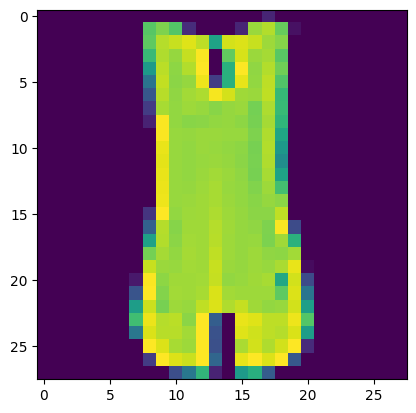

In [29]:
index = 4
np.set_printoptions(linewidth=320)
print(f'LABEL:{training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_image[index]}')
plt.imshow(training_image[index])

In [30]:
training_image = training_image / 255.0  #make normalisation to make training process be more easy specially in computer vision.
testing_image = testing_image / 255.0

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    # for testing which is better in fitting
    # tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    #  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Sequential: That defines a sequence of layers in the neural network.

Flatten: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

ReLU effectively means:

if x > 0: 
  return x

else: 
  return 0
In other words, it only passes values greater than 0 to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this lecture if you want to know more about the Softmax function and how the values are computed.

In [40]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')


input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [41]:
model.compile(optimizer= tf.optimizers.Adam(), loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
print(f'\nMODEL TRAINING:')
model.fit(training_image, training_labels, epochs= 10, callbacks=[callbacks])


MODEL TRAINING:
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8174 - loss: 0.5190
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9005 - loss: 0.2696
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9198 - loss: 0.2151
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9326 - loss: 0.1840
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9411 - loss: 0.1580
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9498 - loss: 0.1350
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9579 - loss: 0.1111
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9650 - loss: 0.0951
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9712 - loss: 0.0804
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9753 - loss: 0.0683


In [42]:
print(f'\nMODEL EVALUATION:')
model.evaluate(testing_image, testing_labels)


MODEL EVALUATION:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9081 - loss: 0.3411


[0.32360270619392395, 0.9122999906539917]

In [43]:
classifications = model.predict(testing_image)
print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[2.5989926e-09 1.6918369e-11 5.7944372e-10 3.3239322e-10 3.4773948e-11 2.5442173e-08 1.4750191e-11 3.1192683e-06 3.9903389e-10 9.9999690e-01]


In [44]:
print(testing_labels[0])

9
